# Project 1
Author: Regina Fennessy

----------------------------------------------------------------------------------


## Introduction

In this project I will use a real world phenomenon data set with four different variables.
I will investigate the variables,their likely distribution and their relationship to each other.<br>
The data set that I have choosen is in relation to the Titanic. The variables that I'm going to investigate are as follows:<br>
1.Survived<br>
2.Class<br>
3.Sex<br>
4.Age<br>
5.Fares

-------------------------------------------------------------------------------------

## Importing Libraries

In [1]:
# Importing numpy and renaming it 
import numpy as np

In [2]:
# Importing pandas and renaming it 
import pandas as pd

In [3]:
# Importing seaborn and renaming it
import seaborn as sns

In [4]:
# Importing matplotlib and renaming it
import matplotlib.pyplot as plt

In [5]:
# Importing statistics and renaming it
import statistics as sts

In [6]:
# Importing scipy.special and renaming it
import scipy.special as sps

In [8]:
# Importing randrange form random
from random import randrange, choice

In [9]:
# Importing make_classification form sklearn.datasets
from sklearn.datasets import make_classification

In [12]:
# Importing GridSearchCV form sklearn.model_selection
from sklearn.model_selection import GridSearchCV

In [13]:
rand_state = 1

--------------------------------------------------------------------------------------------------------------

## Data Set and Data Cleaning

![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/300px-RMS_Titanic_3.jpg)

In [14]:
# Reading in csv file
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


I'm droppping the columns such as Cabin, Embarked, Parch, Ticket, Name and passenger ID that is not required here for the purpose of this exercise and also cleaning up the data where information is missing

In [15]:
# Dropping columns
df = df.drop(['Cabin','Embarked','Parch','Ticket','Name','PassengerId'], axis=1)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [17]:
df.shape


(891, 6)

In [18]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Fare        float64
dtype: object

In [19]:
# Replacing missing data with modes of the column
print(df.isnull().values.any())
print(df.shape)
modes={}
for eachcol in df.columns:
    mode_col= df[eachcol].mode()[0] # Gets mode of each column
    modes[eachcol]= mode_col # Storing mode 
    
    df[eachcol] = df[eachcol].replace(np.nan, mode_col)
# Checking to see if the gaps have been replaced
print(df.isnull().values.any())
print(df.shape)

True
(891, 6)
False
(891, 6)


In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000
887,1,1,female,19.0,0,30.0000
888,0,3,female,24.0,1,23.4500
889,1,1,male,26.0,0,30.0000


## Investigating relationships between Age and Sex

Note: Their is significantly more male as to female on this ship and this is mainly because of the crew that worked on the ship which was male. In total for the officers and crew the men totalled 896 whereas the woman accounted for 22.

In [21]:
# Counting Males V Female
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Female Age')

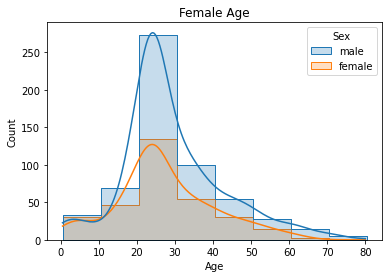

In [22]:
#Plots age by Male/Female with bins of 10
sns.histplot(df, x="Age", hue="Sex", element="step", binwidth=10, kde= True)
plt.title("Female Age")

In [23]:
Male = df.loc [df ["Sex"] == "male"]
Female = df.loc [df ["Sex"] == "female"]

The age between 20 to 30 has the highest amount of people and this was mainly because of the working age of the crew.

The data for age in this analysis shows that the data is following a normal distribution. Normal distribution is also known as Gaussian distribution and is the most common distribution for independent, randomly generated variables, in this case the age of the passengers on board the titanic. It displays a bell shaped curve and is characterized by two parameters, the mean of the data which is the maximum of the graph and about which the graph is always symmetric and the standard deviation which determines the amount of dispersion (spread) away from the mean. A small standard deviation when compared to the mean produces a steep graph and a large standard deviation produces a flat graph. From the analysis of age between male & female it can be concluded that both groups follow a similar dispersion away from the mean and that the male group have a smaller standard deviation from the mean than the female.

Text(0.5, 1.0, 'Age')

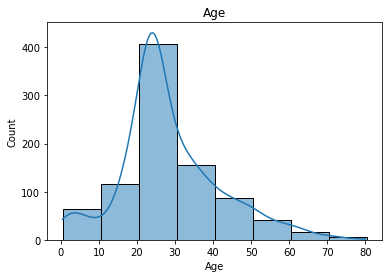

In [24]:
#Plots age 
sns.histplot(df['Age'], binwidth=10, kde= True)
plt.title("Age")

Text(0.5, 1.0, 'Male Age')

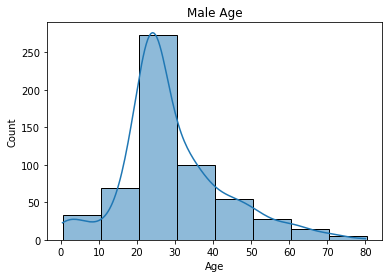

In [25]:
#Plots age by Male with bins of 10
sns.histplot(data = Male,x = "Age", binwidth=10, kde= True)
plt.title("Male Age")

Text(0.5, 1.0, 'Female Age')

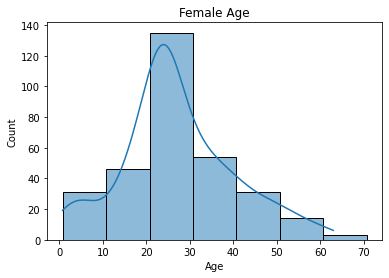

In [26]:
#Plots age by Male with bins of 10
sns.histplot(data = Female,x = "Age", binwidth=10, kde= True)
plt.title("Female Age")

## Correlations between age/sex and Survived

The below graphs shows that fewer males survived than females. This is because women and children were first to be put on the lifeboats. Here we also see that most of the men that died were in the age range of 20 to 40 but must of the women that survived were in the 20 to 45 range.

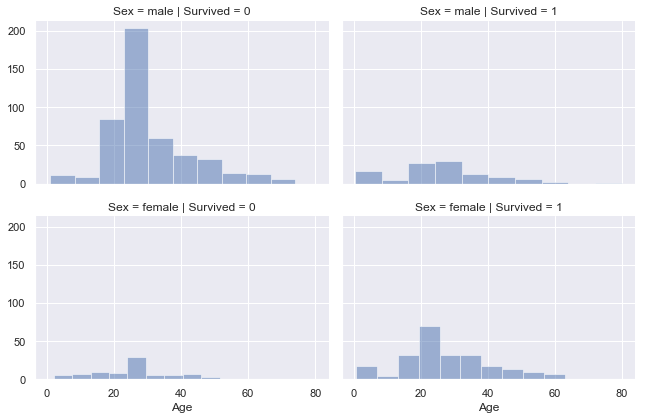

In [27]:
#setting grid style
sns.set(style="darkgrid")
#grid map
grid = sns.FacetGrid(df, col='Survived', row='Sex', height=3, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=10)
grid.add_legend();

## Correlations between Pclass and other variables

Here we are showing the correlations between Pclass and Age/Fare/Survived/Sex. 

In the first plot we can see that the majority of the age range 20 to 30 area in Pclass 3 with were made up mainly of the crew.

The second plot shows that Pclass 1 and 2 are similar in the fare cost.

The third plot shows that Pclass 2 were most of the survivors.

The fourth plot shows that most of the Pclass 3 were made up of males and Pclass 2 were mostly female



<AxesSubplot:xlabel='Sex', ylabel='Count'>

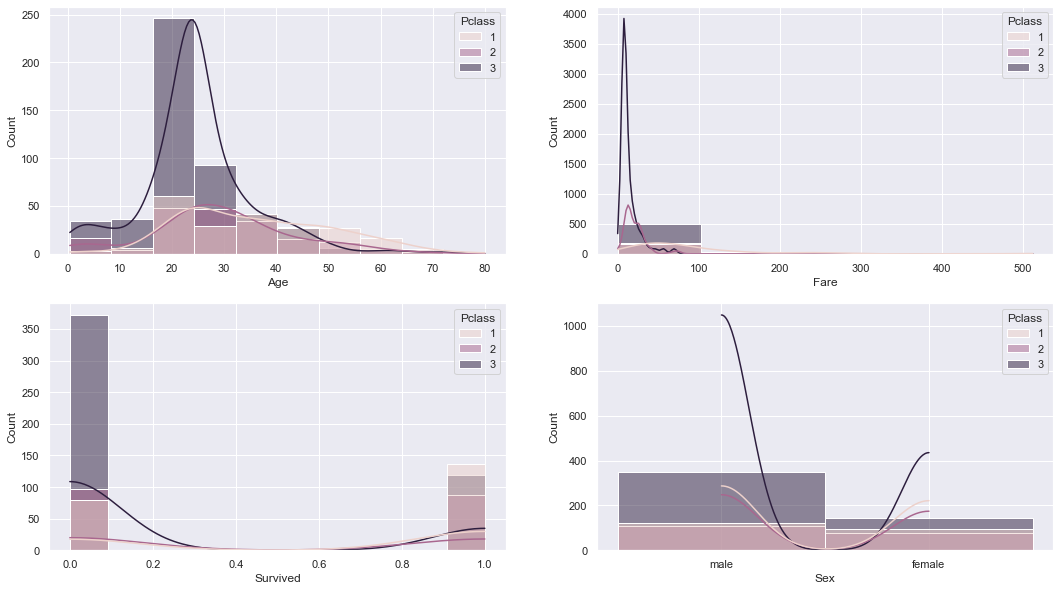

In [28]:
fig, axes  = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0, 0],data= df, x = "Age", hue = "Pclass", bins = 10, kde = True)
sns.histplot(ax=axes[0, 1],data= df, x = "Fare", hue = "Pclass", bins = 5, kde = True)
sns.histplot(ax=axes[1, 0],data= df, x = "Survived", hue = "Pclass",  kde = True)
sns.histplot(ax=axes[1, 1],data= df, x = "Sex", hue = "Pclass", bins = 2, kde = True)

Below is a scatterpolt that plots age and sex by Pclass. Here you can see that the most people on board fall under the  Pclass 3 group. This is mainly got to do with the workers on board.

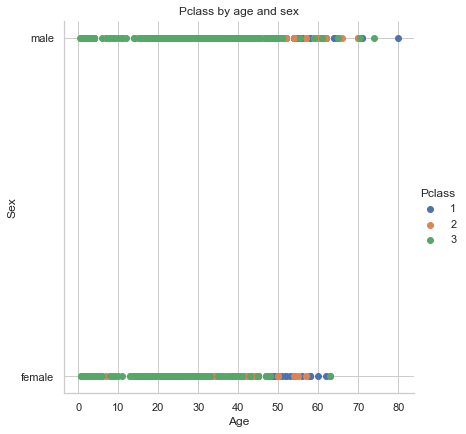

In [29]:
#Creating a scatter Plot
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Pclass", height=6) \
.map(plt.scatter, "Age", "Sex" ) \
.add_legend()  
plt.title("Pclass by age and sex")  
plt.show() 


Below is a plot

C:\Users\g025067\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


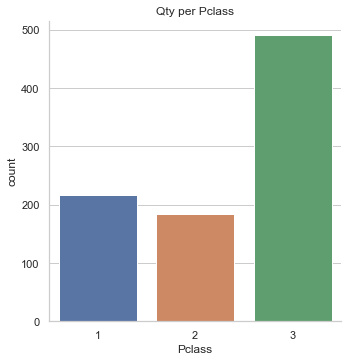

In [30]:
sns.catplot('Pclass',data=df,kind='count')
plt.title("Qty per Pclass")
plt.show()

In the histogram below it plots the fare cost and displays the mean fare in the dashed line.

Text(0.5, 0, 'Fare (in Dollars)')

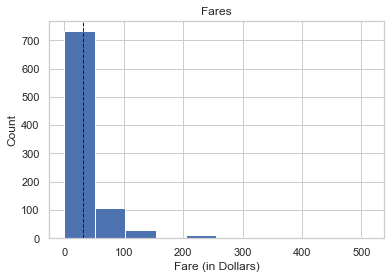

In [31]:
plt.hist(df.Fare)
plt.axvline(df.Fare.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Fares')
plt.ylabel('Count')
plt.xlabel('Fare (in Dollars)')

## Synthesing the Data

Thye below data will show how I created 100 new data points for both male and female passengers.Histograms is then created with new data to simulate the above data set. The histograms are a normal distrubtion similar to the real dataset

In [32]:
Male = df.loc [df ["Sex"] == "male"]
Female = df.loc [df ["Sex"] == "female"]

In [33]:
Male = Male.drop(["Sex","SibSp"], axis = 1)

In [34]:
X= Male

#  Using GridSearchCV to determine the best parameter for bandwidth
bandwidth_params = {'bandwidth': np.arange(0.5,1,0.05)}
grid_search = GridSearchCV(KernelDensity(), bandwidth_params)
grid_search.fit(X)
kde = grid_search.best_estimator_

# Generate/sample 100 new rows from this dataset
sd_male = kde.sample(100, random_state=rand_state)

In [35]:
df_sd_male = pd.DataFrame(sd_male, columns=["Survived","Pclass","Age","Fare"])
#df_sd_male["Species"] = "Pclass"
df_sd_male["Sex"] = "male"
df_sd_male.head()

,Survived,Pclass,Age,Fare,Sex
0,0.299853,1.078909,23.709106,8.515776,male
1,0.218590,2.723911,22.788788,12.809280,male
2,0.177233,3.389549,22.188385,7.363058,male
3,-0.637129,1.358686,24.115730,32.073010,male
4,1.138972,2.175899,24.643479,12.393206,male


Text(0.5, 1.0, 'Male Age')

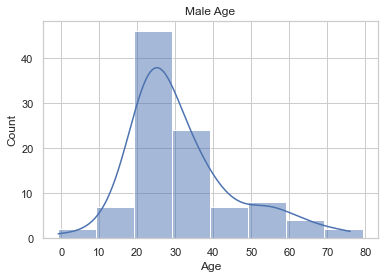

In [36]:
#Plots age 
sns.histplot(df_sd_male['Age'], binwidth=10, kde= True)
plt.title("Male Age")

In [37]:
Female = Female.drop(["Sex","SibSp"], axis = 1)

In [38]:
X= Female

# Fit a kernel density model using GridSearchCV to determine the best parameter for bandwidth
bandwidth_params = {'bandwidth': np.arange(0.5,1,0.05)}
grid_search = GridSearchCV(KernelDensity(), bandwidth_params)
grid_search.fit(X)
kde = grid_search.best_estimator_

# Generate/sample 100 new rows from this dataset
sd_ale = kde.sample(100, random_state=rand_state)

In [39]:
df_sd_female = pd.DataFrame(df, columns=["Survived","Pclass","Age","Fare"])
df_sd_female["Sex"] = "female"
df_sd_female.head()

,Survived,Pclass,Age,Fare,Sex
0,0,3,22.0,7.2500,female
1,1,1,38.0,71.2833,female
2,1,3,26.0,7.9250,female
3,1,1,35.0,53.1000,female
4,0,3,35.0,8.0500,female


Text(0.5, 1.0, 'Female Age')

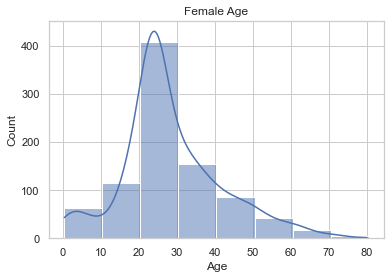

In [40]:
#Plots age 
sns.histplot(df_sd_female['Age'], binwidth=10, kde= True)
plt.title("Female Age")

The below plot shows the male population who didnt survive v survived.

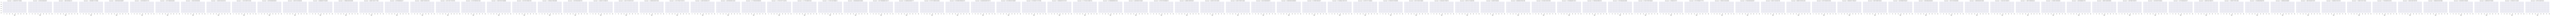

In [45]:
# Grid Style
sns.set(style="darkgrid")
# Grid map
grid = sns.FacetGrid(df_sd_male, col='Survived', height=3, aspect=1.5)
# Plot by Age with bin size 10
grid.map(plt.hist, 'Age', alpha=.5, bins=10)
grid.add_legend();

The below plot shows the female population who didnt survive v survived. ALso shows female survial by class that is similar to the real dataset.

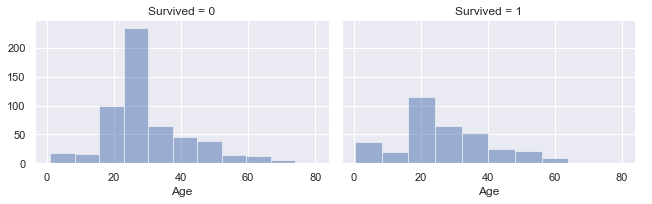

In [42]:
# Grid Style
sns.set(style="darkgrid")
# Grid map
grid = sns.FacetGrid(df_sd_female, col='Survived', height=3, aspect=1.5)
# Plot by Age with bin size 10
grid.map(plt.hist, 'Age', alpha=.5, bins=10)
grid.add_legend();

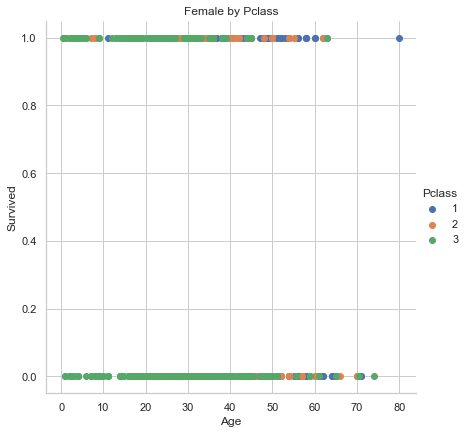

In [43]:
#Creating a scatter Plot
sns.set_style("whitegrid")
sns.FacetGrid(df_sd_female, hue="Pclass", height=6) \
.map(plt.scatter, "Age", "Survived" ) \
.add_legend()  
plt.title("Female by Pclass")  
plt.show() 

## References

https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

https://seaborn.pydata.org/generated/seaborn.histplot.html

https://www.codingninjas.com/codestudio/library/intro-to-titanic-dataset-and-data-analysis

https://en.wikipedia.org/wiki/Titanic

https://www.britannica.com/topic/Titanic

http://www.icyousee.org/titanic.html

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html
  
https://www.britannica.com/topic/normal-distribution 
  
  

  